In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

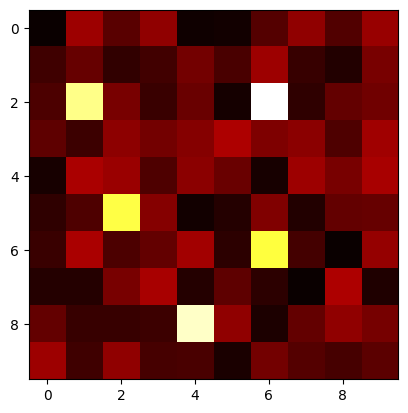

In [8]:


# Data generation function
def generate_data(grid_size=10, num_fire_cells=5):
    data = np.random.uniform(20, 35, (grid_size, grid_size))  # Normal temperature range
    labels = np.zeros((grid_size, grid_size))
    
    # Randomly add fire cells with higher temperature
    fire_positions = np.random.choice(grid_size*grid_size, num_fire_cells, replace=False)
    for pos in fire_positions:
        row, col = divmod(pos, grid_size)
        data[row, col] = np.random.uniform(60, 80)  # Fire temperature range
        labels[row, col] = 1  # Label as fire
    
    return data, labels

# Define a simple feedforward neural network
class FireDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FireDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Train the model
def train_model(model, X_train, y_train, num_epochs=200):
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Visualization function
def visualize_grid(data, labels, model=None, grid_size=10):
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='hot', interpolation='nearest')
    predictions = None
    
    def on_click(event):
        nonlocal predictions
        if event.inaxes == ax:
            x, y = int(event.xdata), int(event.ydata)
            data[y, x] = np.random.uniform(60, 80)  # Simulate fire by clicking
            ax.imshow(data, cmap='hot', interpolation='nearest')
            plt.draw()
            if model:
                # Predict fire/non-fire with the trained model
                with torch.no_grad():
                    model.eval()
                    input_data = torch.tensor(data.reshape(-1, 1), dtype=torch.float32)
                    predictions = model(input_data).reshape(grid_size, grid_size).round()
                    ax.contour(predictions.numpy(), levels=[0.5], colors='blue')
                plt.draw()
    
    fig.canvas.mpl_connect('button_press_event', on_click)
    plt.show()

# Main execution
grid_size = 10
data, labels = generate_data(grid_size=grid_size)
X_train = torch.tensor(data.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(labels.reshape(-1, 1), dtype=torch.float32)

# Initialize and train the model
model = FireDetectionModel(input_dim=1)
train_model(model, X_train, y_train)

# Visualize the grid and interactively add fire
visualize_grid(data, labels, model, grid_size)


In [7]:
generate_data(10)

(array([[29.77820986, 24.03171415, 23.07086491, 22.28168286, 21.26465329,
         32.94074163, 24.96632879, 28.02292488, 24.88777501, 20.095297  ],
        [27.5815618 , 30.0697023 , 27.66767898, 20.1214588 , 27.39787343,
         22.29671482, 33.0245186 , 23.40688112, 34.22687138, 29.4998264 ],
        [20.60193147, 29.96996771, 29.07820678, 27.3247578 , 29.17227706,
         32.91759475, 23.86616301, 30.17227369, 30.94479186, 30.23645066],
        [32.51026948, 22.83754524, 33.28730434, 27.66755891, 21.77596384,
         24.2528754 , 33.74376556, 29.54970988, 33.3387711 , 25.66106109],
        [31.6196544 , 26.16769085, 21.97120271, 32.77709953, 31.16344019,
         20.50336139, 21.69958216, 69.16224346, 33.1115824 , 30.78800088],
        [24.79288237, 25.5650639 , 21.7446526 , 29.95341753, 23.46536594,
         32.20028077, 32.01458069, 21.88943348, 23.77833983, 30.40059257],
        [31.66483844, 34.72691307, 28.41646329, 20.69835828, 28.13040664,
         28.87044094, 27.0729945

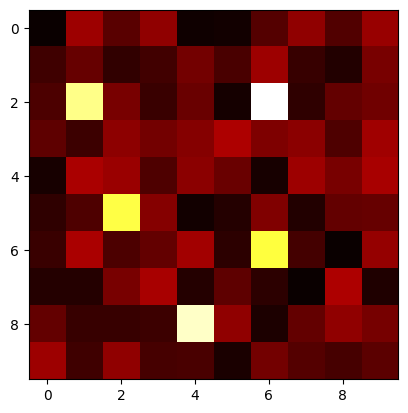

In [15]:
visualize_grid(data, labels, model, grid_size)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Epoch [10/100], Train Loss: 0.7818, Validation Loss: 0.8209
Epoch [20/100], Train Loss: 0.7117, Validation Loss: 0.7268
Epoch [30/100], Train Loss: 0.7165, Validation Loss: 0.7221
Epoch [40/100], Train Loss: 0.7045, Validation Loss: 0.7189
Epoch [50/100], Train Loss: 0.7012, Validation Loss: 0.7221
Epoch [60/100], Train Loss: 0.6971, Validation Loss: 0.7153
Epoch [70/100], Train Loss: 0.6936, Validation Loss: 0.7091
Epoch [80/100], Train Loss: 0.6902, Validation Loss: 0.7065
Epoch [90/100], Train Loss: 0.6869, Validation Loss: 0.7041
Epoch [100/100], Train Loss: 0.6836, Validation Loss: 0.7003
Accuracy on test set: 80.40%


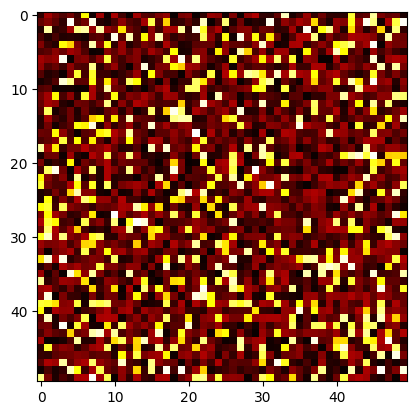

In [19]:


# Data generation function
def generate_data(grid_size=50, num_fire_cells=500):
    data = np.random.uniform(20, 35, (grid_size, grid_size))  # Normal temperature range
    labels = np.zeros((grid_size, grid_size))
    
    # Randomly add fire cells with higher temperature
    fire_positions = np.random.choice(grid_size*grid_size, num_fire_cells, replace=False)
    for pos in fire_positions:
        row, col = divmod(pos, grid_size)
        data[row, col] = np.random.uniform(60, 80)  # Fire temperature range
        labels[row, col] = 1  # Label as fire
    
    return data, labels

# Define a simple feedforward neural network
class FireDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FireDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Train the model with validation
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=100):
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        y_pred_train = model(X_train)
        loss_train = criterion(y_pred_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                y_pred_val = model(X_val)
                loss_val = criterion(y_pred_val, y_val)
                print(f'Epoch [{epoch+1}/{num_epochs}], '
                      f'Train Loss: {loss_train.item():.4f}, '
                      f'Validation Loss: {loss_val.item():.4f}')

# Visualization function
def visualize_grid(data, labels, predictions=None, grid_size=50):
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='hot', interpolation='nearest')
    
    if predictions is not None:
        ax.contour(predictions.numpy(), levels=[0.5], colors='blue')

    plt.show()

# Main execution
grid_size = 50
data, labels = generate_data(grid_size=grid_size)

# Flatten the data and labels for training
X = data.reshape(-1, 1)
y = labels.reshape(-1, 1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Initialize and train the model
model = FireDetectionModel(input_dim=1)
train_model(model, X_train, y_train, X_val, y_val)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).round()
    accuracy = accuracy_score(y_test.numpy(), y_pred_test.numpy())
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Visualize the original grid with predictions on the entire grid
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X, dtype=torch.float32)).reshape(grid_size, grid_size).round()
    visualize_grid(data, labels, predictions, grid_size)


Epoch [10/100], Train Loss: 3.1199, Validation Loss: 2.8572
Epoch [20/100], Train Loss: 2.0945, Validation Loss: 1.8937
Epoch [30/100], Train Loss: 1.1929, Validation Loss: 1.0677
Epoch [40/100], Train Loss: 0.7007, Validation Loss: 0.6910
Epoch [50/100], Train Loss: 0.6896, Validation Loss: 0.7444
Epoch [60/100], Train Loss: 0.6978, Validation Loss: 0.7487
Epoch [70/100], Train Loss: 0.6724, Validation Loss: 0.7050
Epoch [80/100], Train Loss: 0.6646, Validation Loss: 0.6845
Epoch [90/100], Train Loss: 0.6640, Validation Loss: 0.6809
Epoch [100/100], Train Loss: 0.6610, Validation Loss: 0.6815


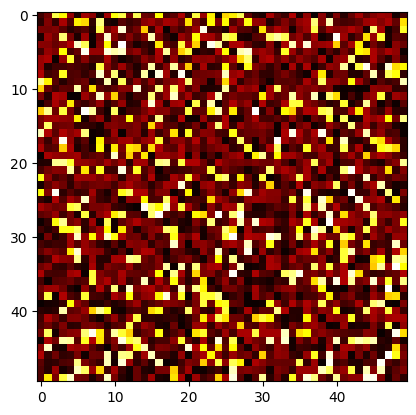

Accuracy on test set: 80.60%


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data generation function
def generate_data(grid_size=50, num_fire_cells=500):
    data = np.random.uniform(20, 35, (grid_size, grid_size))  # Normal temperature range
    labels = np.zeros((grid_size, grid_size))
    
    # Randomly add fire cells with higher temperature
    fire_positions = np.random.choice(grid_size*grid_size, num_fire_cells, replace=False)
    for pos in fire_positions:
        row, col = divmod(pos, grid_size)
        data[row, col] = np.random.uniform(60, 80)  # Fire temperature range
        labels[row, col] = 1  # Label as fire
    
    return data, labels

# Define a simple feedforward neural network
class FireDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FireDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Train the model with validation
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=100):
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        y_pred_train = model(X_train)
        loss_train = criterion(y_pred_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                y_pred_val = model(X_val)
                loss_val = criterion(y_pred_val, y_val)
                print(f'Epoch [{epoch+1}/{num_epochs}], '
                      f'Train Loss: {loss_train.item():.4f}, '
                      f'Validation Loss: {loss_val.item():.4f}')

# Interactive visualization function
def interactive_fire_detection(data, model, grid_size=50):
    fig, ax = plt.subplots()
    heatmap = ax.imshow(data, cmap='hot', interpolation='nearest')

    def update_predictions():
        model.eval()
        with torch.no_grad():
            input_data = torch.tensor(data.reshape(-1, 1), dtype=torch.float32)
            predictions = model(input_data).reshape(grid_size, grid_size).round()
            ax.contour(predictions.numpy(), levels=[0.5], colors='blue')
            plt.draw()

    def on_click(event):
        if event.inaxes == ax:
            x, y = int(event.xdata), int(event.ydata)
            data[y, x] = np.random.uniform(60, 80)  # Simulate fire by clicking
            heatmap.set_data(data)
            plt.draw()
            update_predictions()

    fig.canvas.mpl_connect('button_press_event', on_click)
    update_predictions()
    plt.show()

# Main execution
grid_size = 50
data, labels = generate_data(grid_size=grid_size)

# Flatten the data and labels for training
X = data.reshape(-1, 1)
y = labels.reshape(-1, 1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Initialize and train the model
model = FireDetectionModel(input_dim=1)
train_model(model, X_train, y_train, X_val, y_val)

# Interactive fire detection
interactive_fire_detection(data, model, grid_size)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).round()
    accuracy = accuracy_score(y_test.numpy(), y_pred_test.numpy())
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulate email dataset
def generate_email_data(num_samples=1000):
    np.random.seed(42)
    
    # Features: [word_count, contains_spammy_words, email_length]
    X = np.zeros((num_samples, 3))
    y = np.zeros(num_samples)
    
    for i in range(num_samples):
        word_count = np.random.randint(5, 500)  # Random word count
        contains_spammy_words = np.random.choice([0, 1])  # Whether it contains spammy words
        email_length = word_count + np.random.randint(-5, 10)  # Email length close to word count
        
        # Assign features
        X[i] = [word_count, contains_spammy_words, email_length]
        
        # Simple rule to generate labels (this is arbitrary for the sake of the example)
        if contains_spammy_words == 1 and word_count > 300:
            y[i] = 1  # Mark as spam
        else:
            y[i] = 0  # Mark as ham
    
    return X, y

# Define a simple feedforward neural network
class EmailClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(EmailClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Train the model
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=100):
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        y_pred_train = model(X_train)
        loss_train = criterion(y_pred_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                y_pred_val = model(X_val)
                loss_val = criterion(y_pred_val, y_val)
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                      f'Train Loss: {loss_train.item():.4f}, '
                      f'Validation Loss: {loss_val.item():.4f}')

# Main execution
X, y = generate_email_data(num_samples=1000)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_val = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Initialize and train the model
model = EmailClassificationModel(input_dim=3)
train_model(model, X_train, y_train, X_val, y_val)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).round()
    accuracy = accuracy_score(y_test.numpy(), y_pred_test.numpy())
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Predict on new examples
new_emails = np.array([
    [100, 0, 105],  # Likely ham
    [400, 1, 395],  # Likely spam
    [250, 0, 248],  # Likely ham
])

new_emails_tensor = torch.tensor(new_emails, dtype=torch.float32)
model.eval()
with torch.no_grad():
    predictions = model(new_emails_tensor).round().numpy()
    print(f'Predictions for new emails: {predictions.flatten()}')


Epoch [10/100], Train Loss: 4.6189, Validation Loss: 4.1683
Epoch [20/100], Train Loss: 1.9874, Validation Loss: 1.6862
Epoch [30/100], Train Loss: 0.8875, Validation Loss: 1.0986
Epoch [40/100], Train Loss: 0.6957, Validation Loss: 0.7400
Epoch [50/100], Train Loss: 0.6573, Validation Loss: 0.7157
Epoch [60/100], Train Loss: 0.6550, Validation Loss: 0.6963
Epoch [70/100], Train Loss: 0.6522, Validation Loss: 0.7000
Epoch [80/100], Train Loss: 0.6477, Validation Loss: 0.6906
Epoch [90/100], Train Loss: 0.6388, Validation Loss: 0.6915
Epoch [100/100], Train Loss: 0.6253, Validation Loss: 0.6619
Accuracy on test set: 63.50%
Predictions for new emails: [0. 1. 0.]


In [29]:
import numpy as np

def generate_email_data(num_samples=1000):
    """
    Generate synthetic email data with features and labels for spam classification.
    
    Parameters:
        num_samples (int): Number of email samples to generate.

    Returns:
        X (numpy.ndarray): Feature matrix with shape (num_samples, 3).
        y (numpy.ndarray): Labels array with shape (num_samples,).
    """
    np.random.seed(42)

    # Initialize features and labels arrays
    X = np.zeros((num_samples, 3))  # Features: [word_count, contains_spammy_words, email_length]
    y = np.zeros(num_samples)  # Labels: 0 for ham, 1 for spam

    # Generate features and labels
    for i in range(num_samples):
        word_count = np.random.randint(5, 500)  # Random word count between 5 and 500
        contains_spammy_words = np.random.choice([0, 1])  # Randomly decide if it contains spammy words
        email_length = word_count + np.random.randint(-5, 10)  # Email length close to word count

        # Assign features
        X[i] = [word_count, contains_spammy_words, email_length]
        
        # Define labels based on simple rules:
        if contains_spammy_words == 1 and word_count > 300:
            y[i] = 1  # Mark as spam
        else:
            y[i] = 0  # Mark as ham

    return X, y

# Example usage
X, y = generate_email_data(num_samples=1000)
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print("Sample features and labels:")
print(X[:5])
print(y[:5])


Features shape: (1000, 3)
Labels shape: (1000,)
Sample features and labels:
[[107.   1. 114.]
 [275.   0. 277.]
 [193.   0. 194.]
 [126.   0. 127.]
 [335.   0. 337.]]
[0. 0. 0. 0. 0.]
